In [1]:
import pandas as pd
data= pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
df = data.loc[:,['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [3]:
X=df.drop('BMI',axis=1)
y=df['BMI']

In [4]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,0.627,50
1,1,85,66,29,0,0.351,31
2,8,183,64,0,0,0.672,32
3,1,89,66,23,94,0.167,21
4,0,137,40,35,168,2.288,33
...,...,...,...,...,...,...,...
763,10,101,76,48,180,0.171,63
764,2,122,70,27,0,0.340,27
765,5,121,72,23,112,0.245,30
766,1,126,60,0,0,0.349,47


In [5]:
y

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

C:\Users\82109\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
# 전처리, 표준화
# minmax normalization : x = (x - min) / (max - min) => x / max
# robust normalization : x = (x - 중간값) / (3분위값 - 1분위값)
# standardization : x = x-mean / std

import numpy as np
# 평균

mean = np.mean(X_train, axis = 0)

# 표준편차
std = np.std(X_train, axis = 0) # 표준편차값

# 표준화값
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (7,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                512       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


In [10]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
17/17 [==============================] - 1s 16ms/step - loss: 1024.7690 - mse: 1024.7690 - val_loss: 985.2354 - val_mse: 985.2354
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 934.5927 - mse: 934.5927 - val_loss: 888.0425 - val_mse: 888.0425
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 835.2404 - mse: 835.2404 - val_loss: 774.9994 - val_mse: 774.9994
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 723.4540 - mse: 723.4540 - val_loss: 657.1152 - val_mse: 657.1152
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 604.7220 - mse: 604.7220 - val_loss: 531.0782 - val_mse: 531.0782
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 480.4180 - mse: 480.4180 - val_loss: 403.2682 - val_mse: 403.2682
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 360.0911 - mse: 360.0911 - val_loss: 289.8415 - val_mse: 289.8415
Epoch 8/100
17/17 [=====

Epoch 61/100
17/17 [==============================] - 0s 4ms/step - loss: 37.0016 - mse: 37.0016 - val_loss: 57.3304 - val_mse: 57.3304
Epoch 62/100
17/17 [==============================] - 0s 3ms/step - loss: 36.8382 - mse: 36.8382 - val_loss: 57.7552 - val_mse: 57.7552
Epoch 63/100
17/17 [==============================] - 0s 4ms/step - loss: 36.6215 - mse: 36.6215 - val_loss: 57.7318 - val_mse: 57.7318
Epoch 64/100
17/17 [==============================] - 0s 3ms/step - loss: 36.5094 - mse: 36.5094 - val_loss: 59.1949 - val_mse: 59.1949
Epoch 65/100
17/17 [==============================] - 0s 4ms/step - loss: 36.4586 - mse: 36.4586 - val_loss: 57.9023 - val_mse: 57.9023
Epoch 66/100
17/17 [==============================] - 0s 4ms/step - loss: 36.3239 - mse: 36.3239 - val_loss: 57.6187 - val_mse: 57.6187
Epoch 67/100
17/17 [==============================] - 0s 4ms/step - loss: 36.2226 - mse: 36.2226 - val_loss: 58.3597 - val_mse: 58.3597
Epoch 68/100
17/17 [============================

In [11]:
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 56.0026 - mse: 56.0026


[56.002620697021484, 56.002620697021484]

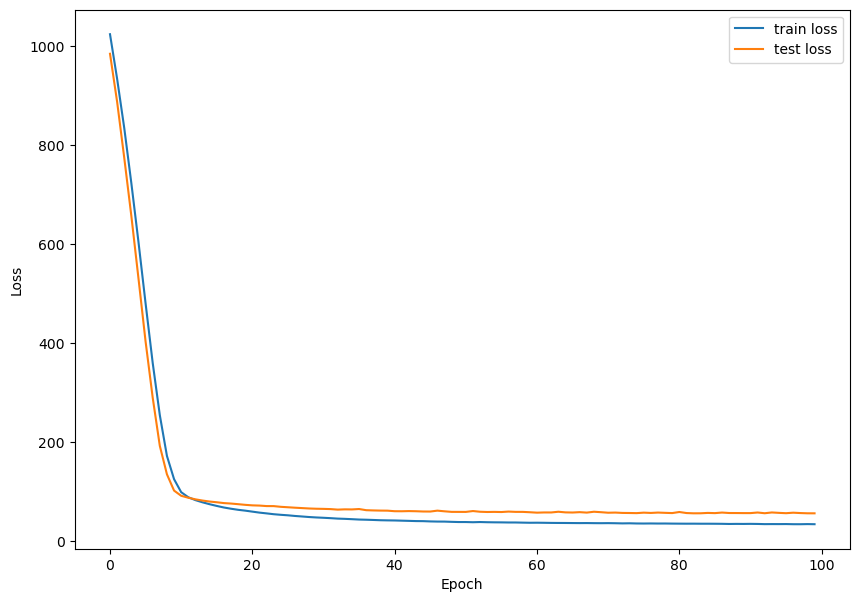

In [12]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

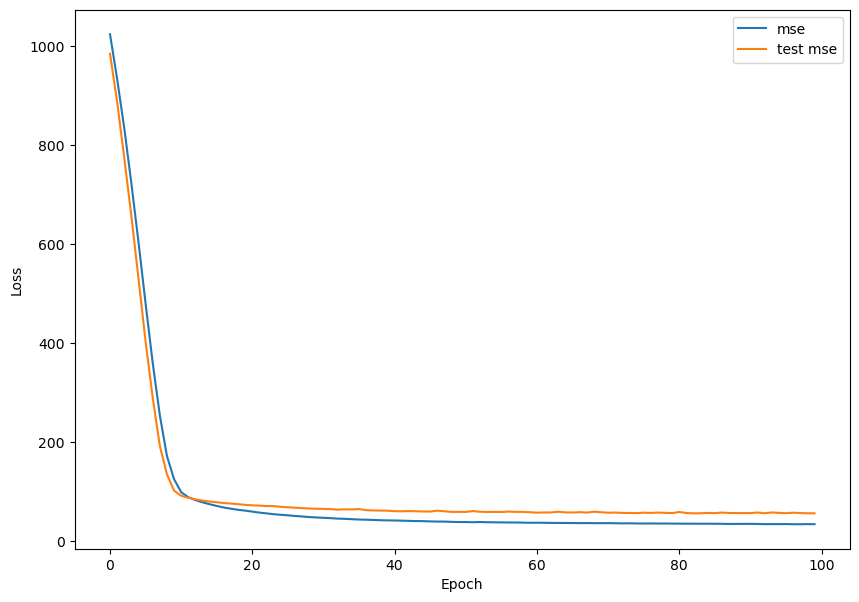

In [13]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()